# Data Wrangling for Walmart Sales Datasets

Walmart’s sales datasets are collected on [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). The datasets contain historical sales data for 45 Walmart stores in the United State along with store information and regional activity from 2/5/2010 to 11/1/2012.

In [1]:
import math
import numpy as np
import pandas as pd
from IPython.display import display

## Import Data

In [2]:
# load data
stores = pd.read_csv('data/stores.csv')
features = pd.read_csv('data/features.csv.zip')
sales = pd.read_csv('data/train.csv.zip')

# convert data type for Date from object to Date
sales['Date'] = pd.to_datetime(sales['Date'])
features['Date'] = pd.to_datetime(features['Date'])

### Stores

This file contains information about 45 Walmart stores and includes the following fields:
- __<i>Store</i>__: store number
- __<i>Type</i>__: store type
- __<i>Size</i>__: size of store

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores.shape

(45, 3)

In [5]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [6]:
stores.dtypes.value_counts()

int64     2
object    1
dtype: int64

### Features

This file contains data related to the store, department, and regional activity for the given dates and includes the following fields:
- __<i>Store</i>__: store number
- __<i>Date</i>__: last day of the week
- __<i>Temperature</i>__: weekly average temperature in the region in Fahrenheit
- __<i>Fuel_Price</i>__: weekly average fuel price (USD)
- __<i>MarkDown</i>__ 
  - MarkDown 1-5 indicating the weekly average markdow
  - MarkDown data is only available after Nov 2011, and is not available for all stores all the time.
  - Any missing value is marked with an NA.
- __<i>CPI</i>__ is the Consumer Price Index which measures the average change in prices over time that consumers pay for a basket of goods and services ([Investopedia](https://www.investopedia.com/terms/c/consumerpriceindex.asp))
- __<i>Unemployment</i>__: weekly average unemployment rate
- __<i>IsHoliday</i>__
  - True if holiday falls within the week
  - False if holiday does not fall within the week

In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
features.shape

(8190, 12)

In [9]:
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [10]:
features.dtypes.value_counts()

float64           9
int64             1
bool              1
datetime64[ns]    1
dtype: int64

### Sales

Contains Walmart historical sales data from February 5th, 2010 to November 1st, 2012 and includes the following fields:
- __<i>Store</i>__: store number
- __<i>Dept</i>__: department number
- __<i>Date</i>__: last day of the week
- __<i>Weekly_Sales</i>__:
  - Weekly sales for the given department in the given store
  - Negative if returns exceed sales
  - Positive if sales exceed returns
- __<i>IsHoliday</i>__: True if holiday falls within the week; otherwise, False

In [11]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
sales.shape

(421570, 5)

In [13]:
sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [14]:
sales.dtypes.value_counts()

int64             2
float64           1
bool              1
datetime64[ns]    1
dtype: int64

## Missing Values

In [15]:
# build data frame of variables with missing values

df_names = ['stores', 'features', 'sales']    # name of data frames
# dictionary used to store information on table and column with missing values
df_dict = {'table': [],
           'col': [],
           'null_count': [],
           'null_pct': [],
           'min': [],
           'max': [],
           'mean': [],
           'median': []}

# iterate through each data frames
# save name of table and column that has missing values along with statistics
for index, df in enumerate([stores, features, sales]):
    for col_name in df.columns:
        temp = df[col_name]
        if temp.hasnans == True:                                         # for column that has missing values
            null_count = len(df[temp.isnull()])                          # count number of missing values
            df_dict['table'].append(df_names[index])                     # save table's name
            df_dict['col'].append(col_name)                              # save column's name
            df_dict['null_count'].append(null_count)                     
            df_dict['null_pct'].append(round(null_count*100/len(temp)))  # percentage of missing values
            df_dict['min'].append(round(temp.min()))
            df_dict['max'].append(round(temp.max()))
            df_dict['mean'].append(round(temp.mean()))
            df_dict['median'].append(round(temp.median()))

# create data frame from dictionary
df_nulls = pd.DataFrame(df_dict)
df_nulls

,table,col,null_count,null_pct,min,max,mean,median
0,features,MarkDown1,4158,51,-2781.0,103185.0,7032.0,4744.0
1,features,MarkDown2,5269,64,-266.0,104520.0,3384.0,365.0
2,features,MarkDown3,4577,56,-179.0,149483.0,1760.0,36.0
3,features,MarkDown4,4726,58,0.0,67475.0,3293.0,1176.0
4,features,MarkDown5,4140,51,-185.0,771448.0,4132.0,2727.0
5,features,CPI,585,7,126.0,229.0,172.0,183.0
6,features,Unemployment,585,7,4.0,14.0,8.0,8.0


## New Columns

- __Num of Depts__ = counts of number of departments for each store
- __Weekly Sales (Thousands)__ = Weekly_Sales / 1000
- __Total Sales (Millions)__ = total Weekly Sales in Thousands / 1000
- __Total MarkDown__ = sum of MarkDown1-5
- __Total MarkDown (Thousands)__ = Total MarkDown / 1000
- __Week__ = week of year extracted from Date
- __Month__ = month extracted from Date
- __Year__ = year extracted from Date
- __Quarter__ = quarter extracted from Date

In [16]:
# number of departments by store
departments = sales.groupby(by=['Store', 'Dept']).count().reset_index()[['Store', 'Dept']].groupby(by='Store').count().reset_index()
departments.rename(columns={'Dept': 'Num of Depts'}, inplace=True)

# add columns to sales df
sales['Weekly Sales (Thousands)'] = sales['Weekly_Sales'] / 1000

# add Total Sales to stores df
store_sales = sales.groupby(by='Store')['Weekly Sales (Thousands)'].sum().to_frame().reset_index()
store_sales['Total Sales (Millions)'] = store_sales['Weekly Sales (Thousands)'] / 1000
store_sales.drop('Weekly Sales (Thousands)', axis=1, inplace=True)

# total markdown
features['Total MarkDown'] = features['MarkDown1'] + features['MarkDown2'] + features['MarkDown3'] + \
                             features['MarkDown4'] + features['MarkDown5']
markdowns = features.groupby(by='Store')['Total MarkDown'].sum().to_frame().reset_index()
markdowns['Total MarkDown (Thousands)'] = markdowns['Total MarkDown'] / 1000
markdowns.drop('Total MarkDown', axis=1, inplace=True)

stores = pd.merge(stores, departments, how='inner', on='Store')  # merge stores and departments
stores = pd.merge(stores, store_sales, how='inner', on='Store')  # merge stores and store_sales
stores = pd.merge(stores, markdowns, how='inner', on='Store')    # merge stores and markdowns

In [17]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Weekly Sales (Thousands)
0,1,1,2010-02-05,24924.50,False,24.92450
1,1,1,2010-02-12,46039.49,True,46.03949
2,1,1,2010-02-19,41595.55,False,41.59555
3,1,1,2010-02-26,19403.54,False,19.40354
4,1,1,2010-03-05,21827.90,False,21.82790


In [18]:
stores.head()

,Store,Type,Size,Num of Depts,Total Sales (Millions),Total MarkDown (Thousands)
0,1,A,151315,77,222.402809,1651.85875
1,2,A,202307,78,275.382441,2166.05982
2,3,B,37392,72,57.586735,392.59244
3,4,A,205863,78,299.543953,2175.19380
4,5,B,34875,72,45.475689,478.63538


In [19]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Total MarkDown
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,NaN
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,NaN
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,NaN
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN


In [20]:
# create a store_sales data frame that contains total sales for each store

# total sales by store and date
weekly_sales = sales.groupby(by=['Store', 'Date'])['Weekly Sales (Thousands)'].sum().to_frame().reset_index()

# merge store_sales and features
store_sales = pd.merge(weekly_sales, features, how='inner', on=['Store', 'Date'])
store_sales['Week'] = store_sales['Date'].dt.week
store_sales['Month'] = store_sales['Date'].dt.month
store_sales['Year'] = store_sales['Date'].dt.year
store_sales['Quarter'] = store_sales['Date'].dt.quarter
store_sales.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
store_sales.head()

,Store,Date,Weekly Sales (Thousands),Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total MarkDown,Week,Month,Year,Quarter
0,1,2010-02-05,1643.69090,42.31,2.572,211.096358,8.106,False,NaN,5,2,2010,1
1,1,2010-02-12,1641.95744,38.51,2.548,211.242170,8.106,True,NaN,6,2,2010,1
2,1,2010-02-19,1611.96817,39.93,2.514,211.289143,8.106,False,NaN,7,2,2010,1
3,1,2010-02-26,1409.72759,46.63,2.561,211.319643,8.106,False,NaN,8,2,2010,1
4,1,2010-03-05,1554.80668,46.50,2.625,211.350143,8.106,False,NaN,9,3,2010,1


## Outliers

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
def boxplot(df_in, num_cols=2, figsize=(10, 8)):
    num_rows = math.ceil(len(df_in.columns) / num_cols)
    fig, axes = plt.subplots(figsize=figsize, nrows=num_rows, ncols=num_cols) 
    col = row = 0
    for col_name in df_in.columns:
        if num_rows == 1 and num_cols == 1:
            ax = axes
        elif num_rows == 1 and num_cols > 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        # draw boxplot
        _ = sns.boxplot(df_in[col_name], ax=ax, orient='v')
        ax.set_ylabel(col_name, fontsize=14)
        
        # set index for column and row
        col += 1
        if col == num_cols:
            col = 0        # reset column
            row = row + 1  # set to next row  
    
    plt.subplots_adjust(hspace=0.4, wspace=0.4)   
    plt.show()

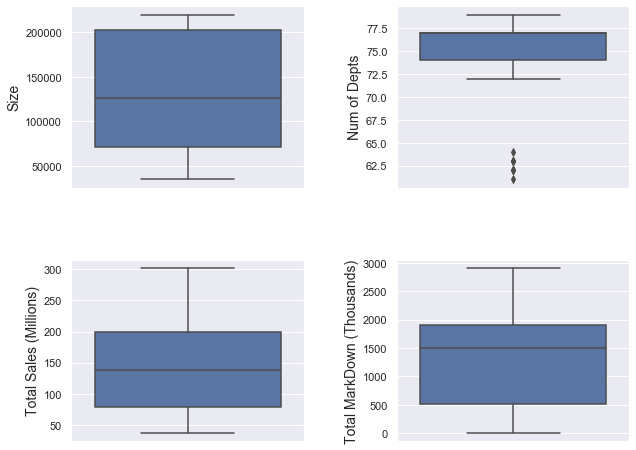

In [23]:
# stores df
boxplot(stores.select_dtypes(include=['number']).drop('Store', axis=1))

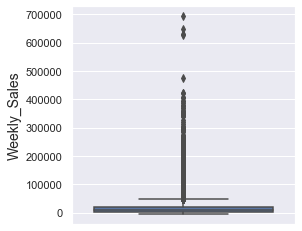

In [24]:
# sales df
boxplot(sales['Weekly_Sales'].to_frame(), num_cols=1, figsize=(4,4))

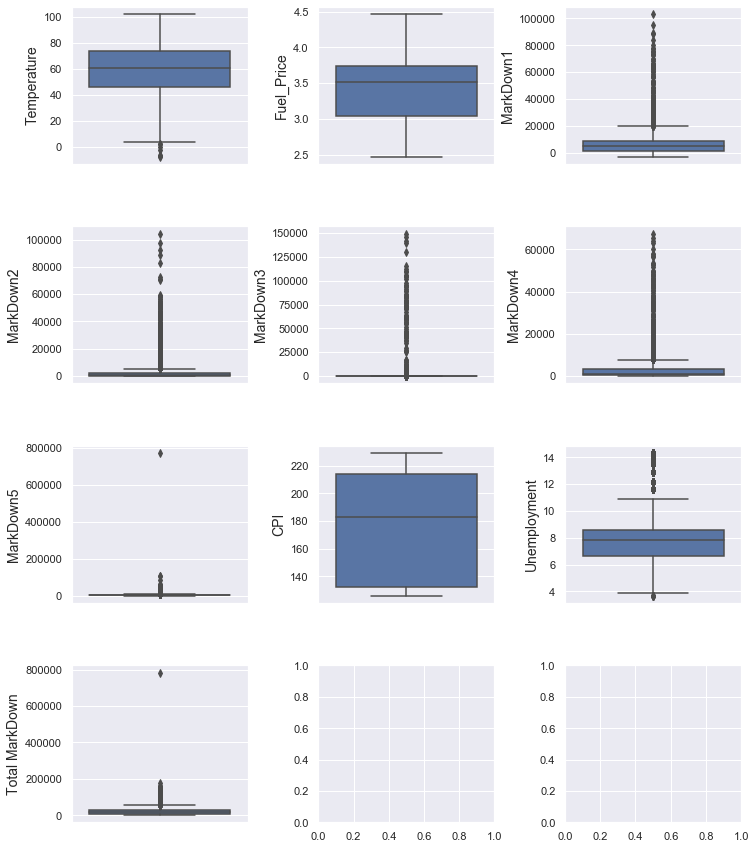

In [25]:
# features df
boxplot(features.select_dtypes(include=['number']).drop('Store', axis=1), num_cols=3, figsize=(12, 15))

## Export Data

In [26]:
stores.to_pickle('out/stores.pkl')
features.to_pickle('out/features.pkl')
sales.to_pickle('out/sales.pkl')
store_sales.to_pickle('out/store_sales.pkl')